In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import copy

import json

np.random.seed(42)

from sklearn.metrics import silhouette_score

In [2]:
with open ('data/datasets.txt', "r") as json_file:
    datasets = json.loads(json_file.read())

In [3]:
from fuzzy import fuzzy_capacity_constraints, centroides, fuzzy_constraints_exato

def funcao_objetivo_fuzzy(X,labels,U):
    obj_func = 0
    for i in range(clusters):
        obj_func+=np.dot(np.linalg.norm(X-X[labels == i].mean(axis=0), axis=1)**2,U[i,:]**2)
    return obj_func

In [4]:
def def_color(X,labels,clusters):
    centroides = [X[label_best==i].mean(axis=0) for i in range(clusters)]
    mapping_color = {}
    restantes = list(range(clusters))
    if clusters == 3:
        for point, color in [(np.array((8,20)),'b'), (np.array((16,15)),'r'),
                             (np.array((4,5)),'g')]:
            ind = np.argmin(np.linalg.norm([centroides[r] for r in restantes] - point, axis=1))
            mapping_color[restantes[ind]] = color
            restantes.remove(restantes[ind])
    elif clusters == 4:
        for point, color in [(np.array((5,20)),'b'), (np.array((10,22)),'r'),
                             (np.array((5,8)),'g'),(np.array((17,15)),'c')]:
            ind = np.argmin(np.linalg.norm([centroides[r] for r in restantes] - point, axis=1))
            mapping_color[restantes[ind]] = color
            restantes.remove(restantes[ind]) 
    elif clusters == 5:
        for point, color in [(np.array((6,24)),'b'), (np.array((14,25)),'r'),
                             (np.array((9,10)),'g'),(np.array((20,16)),'c'),(np.array((18,21)),'m')]:
            ind = np.argmin(np.linalg.norm([centroides[r] for r in restantes] - point, axis=1))
            mapping_color[restantes[ind]] = color
            restantes.remove(restantes[ind]) 
    elif clusters == 6:
        for point, color in [(np.array((3,25)),'b'), (np.array((6,25)),'r'),
                             (np.array((13,25)),'m'),(np.array((18,20)),'y'),
                             (np.array((8,8)),'g'),(np.array((20,15)),'c')]:
            ind = np.argmin(np.linalg.norm([centroides[r] for r in restantes] - point, axis=1))
            mapping_color[restantes[ind]] = color
            restantes.remove(restantes[ind])
    return mapping_color

In [5]:
def def_marker(color):
    maker_color = {'b':'o',
                   'r':'v',
                   'm':'s',
                   'y':'^',
                   'g':'P',
                   'c':'*'}
    return maker_color[color]

### Equi-sized

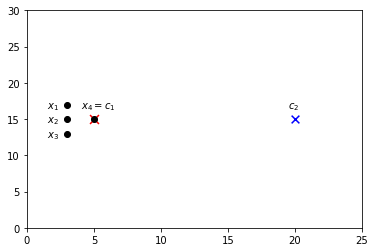

In [59]:
fig, ax = plt.subplots()
plt.scatter([3,3,3],[13,15,17], c='k',marker='o')
plt.plot([5],[15],'ok')
plt.scatter([20],[15], c='b',marker='x',s=60)
plt.text(1.5,16.5,'$x_1$')
plt.text(1.5,14.5,'$x_2$')
plt.text(1.5,12.5,'$x_3$')
plt.text(4,16.5,'$x_4=c_1$')
plt.text(19.5,16.5,'$c_2$')
plt.scatter([5],[15], c='r',marker='x',s=80)
plt.xlim([0, 25])
plt.ylim([0, 30])
plt.show()

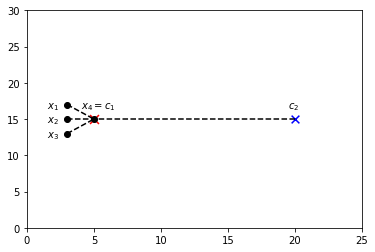

In [58]:
fig, ax = plt.subplots()
plt.scatter([3,3,3],[13,15,17], c='k',marker='o')
plt.plot([5],[15],'ok')
plt.scatter([20],[15], c='b',marker='x',s=60)
plt.text(1.5,16.5,'$x_1$')
plt.text(1.5,14.5,'$x_2$')
plt.text(1.5,12.5,'$x_3$')
plt.text(4,16.5,'$x_4=c_1$')
plt.text(19.5,16.5,'$c_2$')
plt.plot([3,5], [15,15],'k--')
plt.plot([3,5], [17,15],'k--')
plt.plot([3,5], [13,15],'k--')
plt.plot([20,5], [15,15],'k--')
plt.scatter([5],[15], c='r',marker='x',s=80)
plt.xlim([0, 25])
plt.ylim([0, 30])
plt.show()

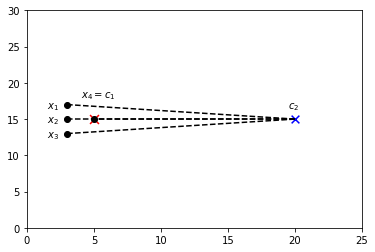

In [62]:
fig, ax = plt.subplots()
plt.scatter([3,3,3],[13,15,17], c='k',marker='o')
plt.plot([5],[15],'ok')
plt.scatter([20],[15], c='b',marker='x',s=60)
plt.text(1.5,16.5,'$x_1$')
plt.text(1.5,14.5,'$x_2$')
plt.text(1.5,12.5,'$x_3$')
plt.text(4,18,'$x_4=c_1$')
plt.text(19.5,16.5,'$c_2$')
plt.plot([3,20], [15,15],'k--')
plt.plot([3,20], [17,15],'k--')
plt.plot([3,20], [13,15],'k--')
plt.plot([20,5], [15,15],'k--')
plt.scatter([5],[15], c='r',marker='x',s=80)
plt.xlim([0, 25])
plt.ylim([0, 30])
plt.show()

Conjunto Original: 2 


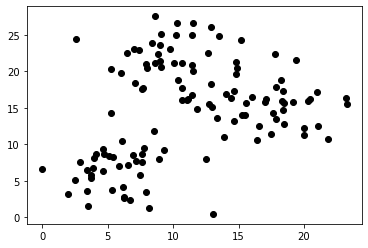

Aplicação do fuzzy_constraints


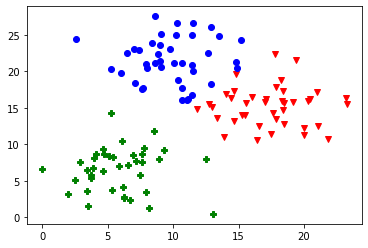

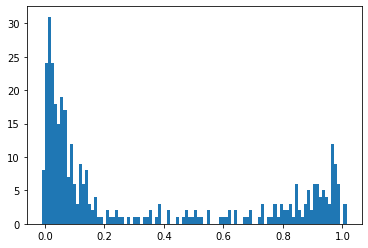

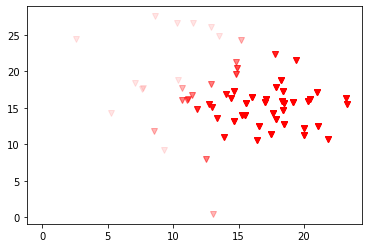

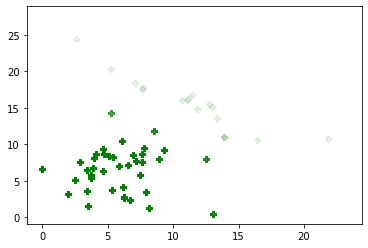

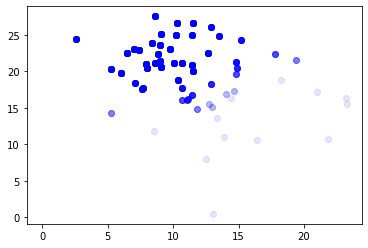

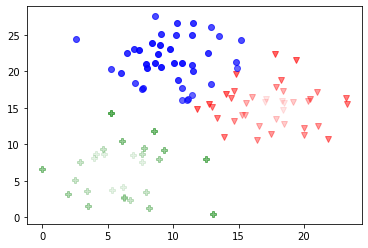

Aplicação do fuzzy_constraints_exato


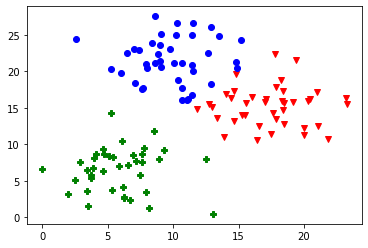

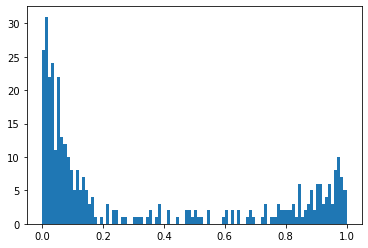

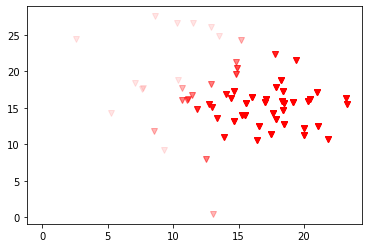

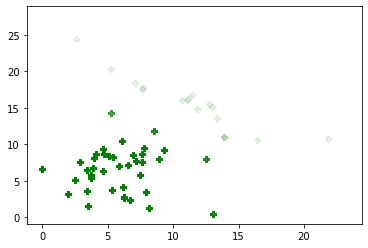

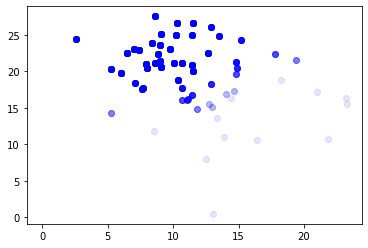

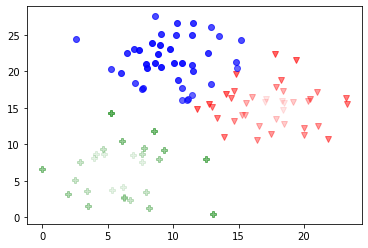

Conjunto Original: 5 


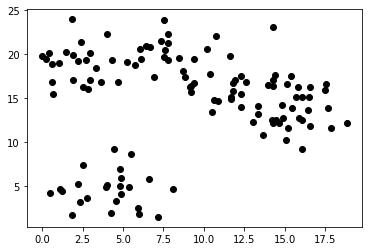

Aplicação do fuzzy_constraints


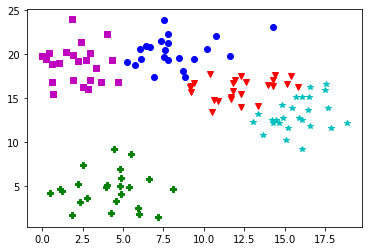

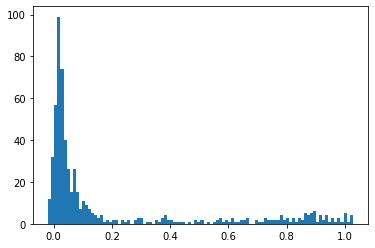

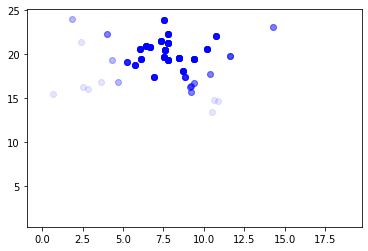

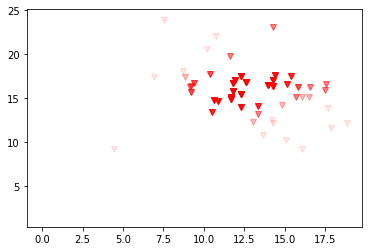

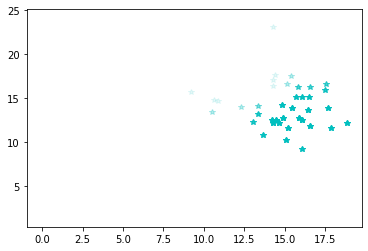

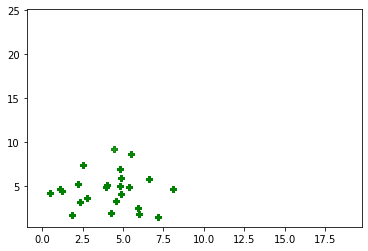

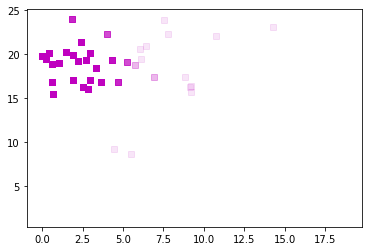

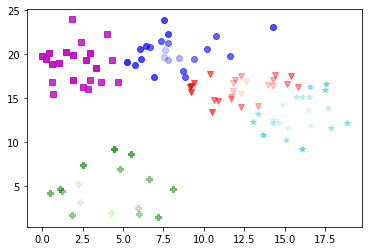

Aplicação do fuzzy_constraints_exato


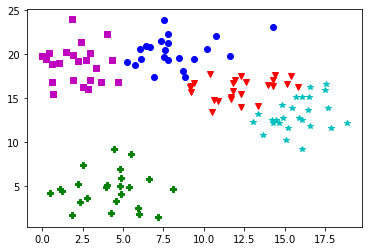

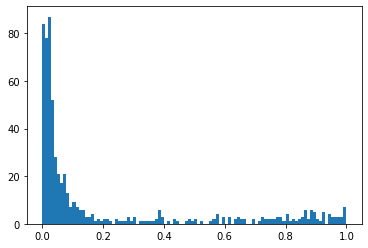

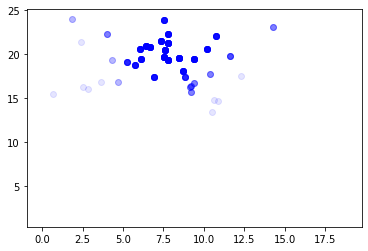

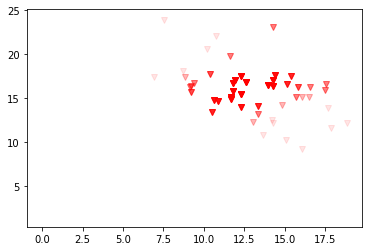

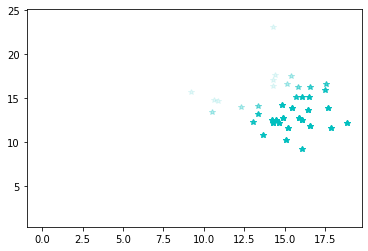

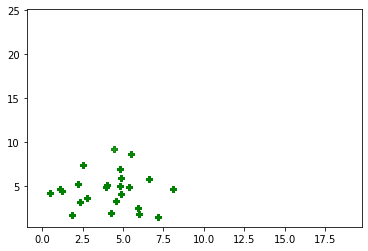

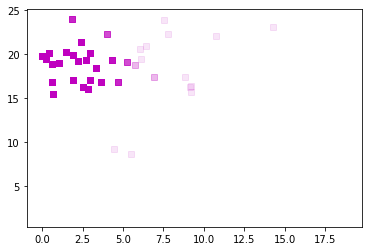

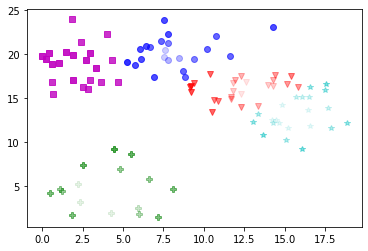

Conjunto Original: 7 


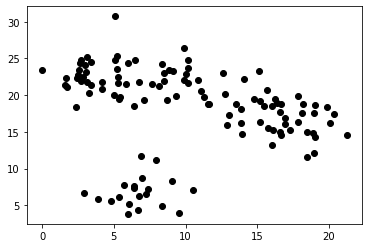

Aplicação do fuzzy_constraints


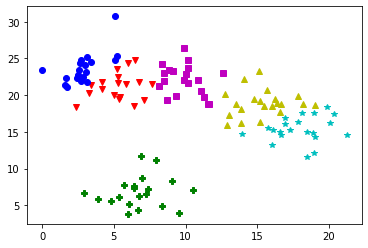

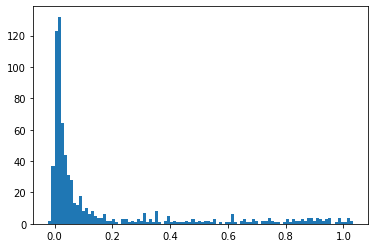

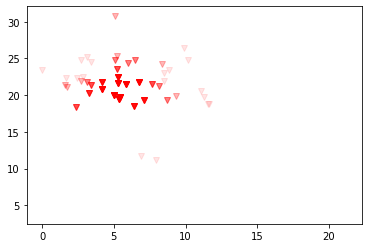

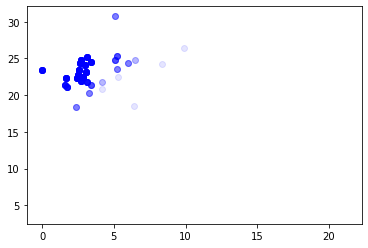

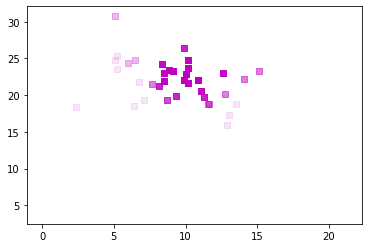

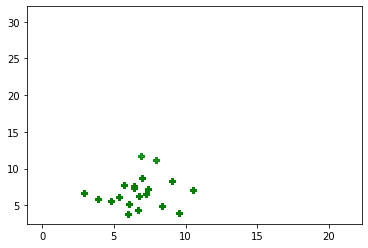

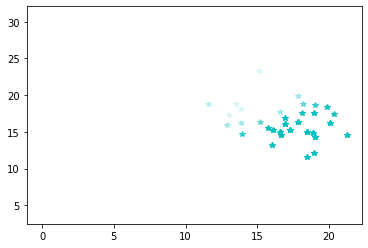

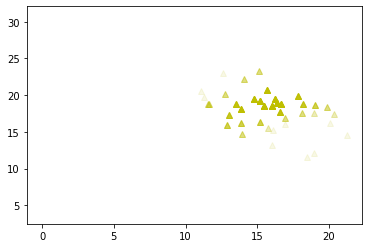

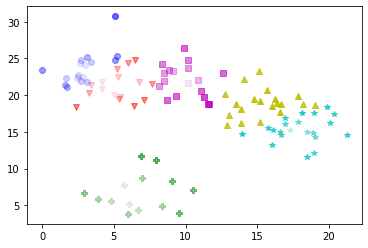

Aplicação do fuzzy_constraints_exato


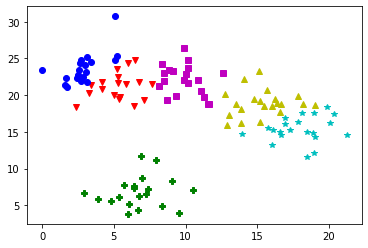

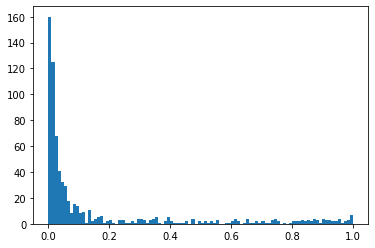

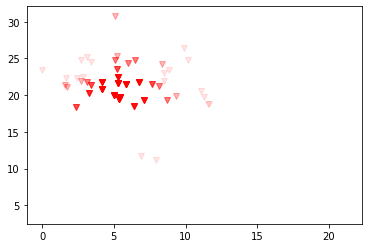

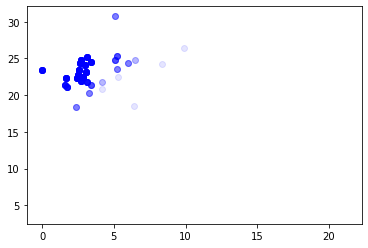

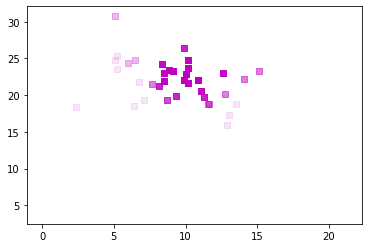

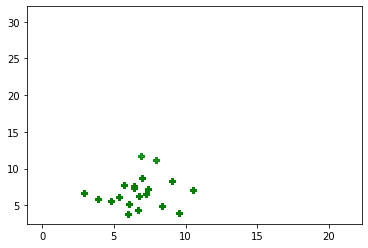

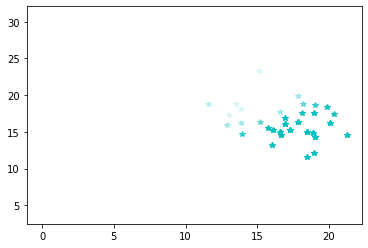

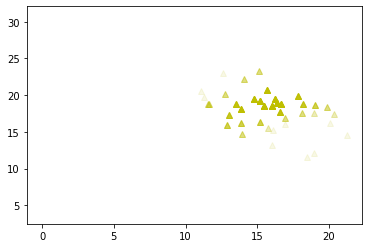

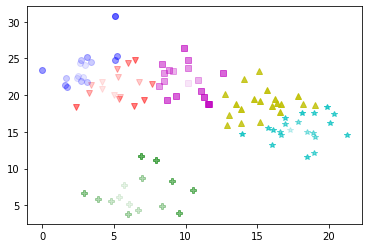

Conjunto Original: 8 


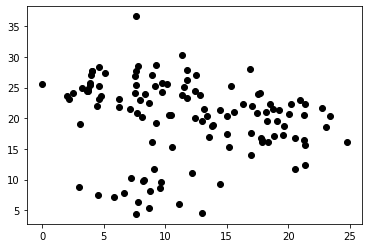

Aplicação do fuzzy_constraints


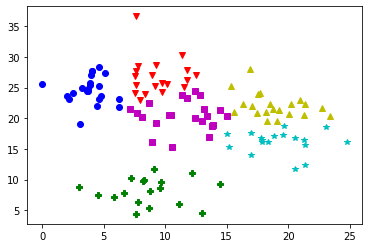

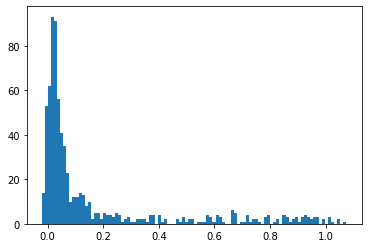

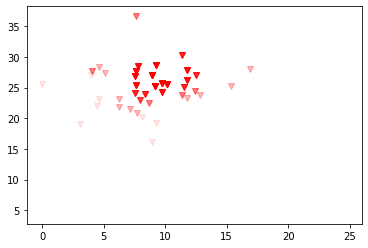

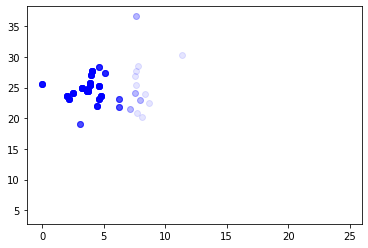

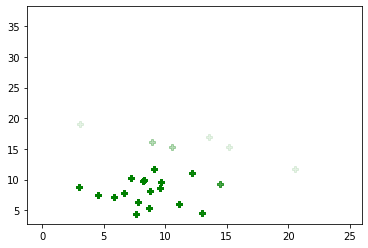

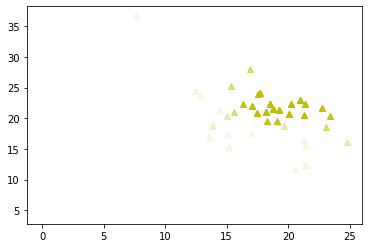

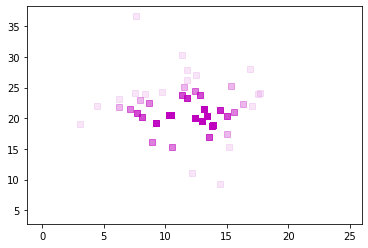

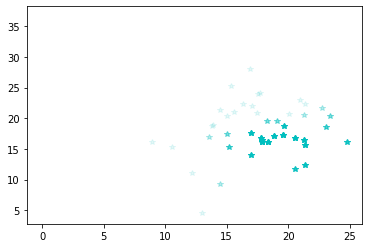

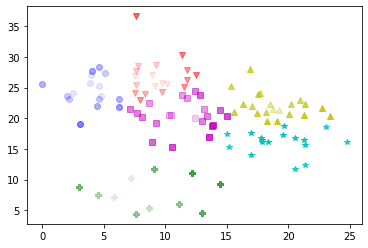

Aplicação do fuzzy_constraints_exato


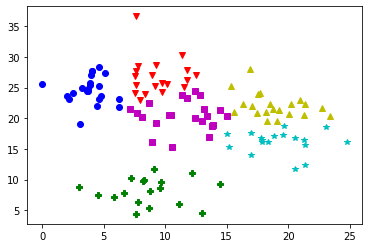

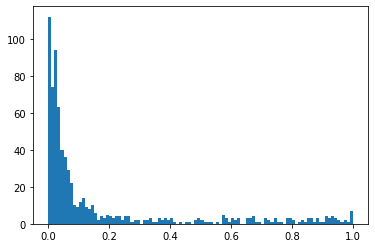

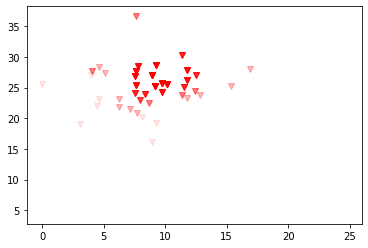

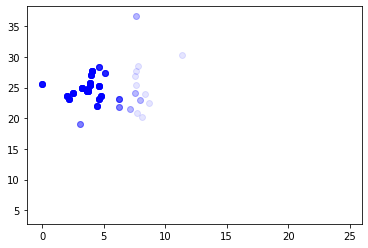

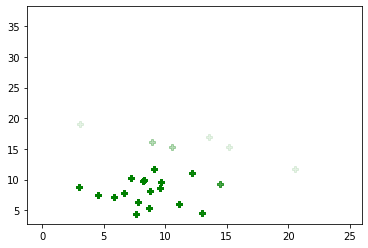

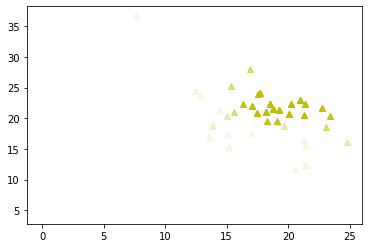

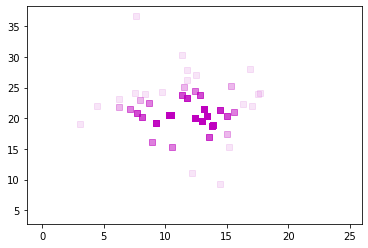

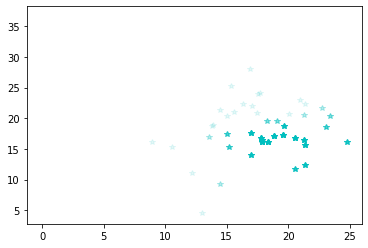

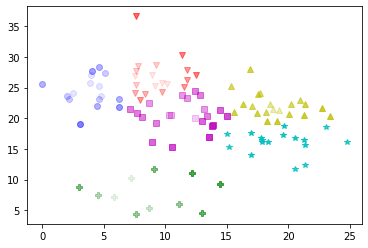

Conjunto Original: 16 


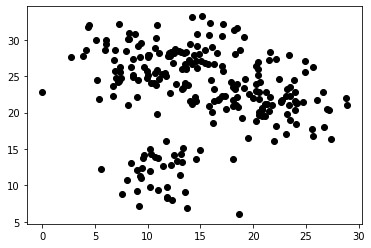

Aplicação do fuzzy_constraints


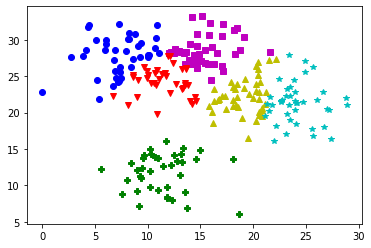

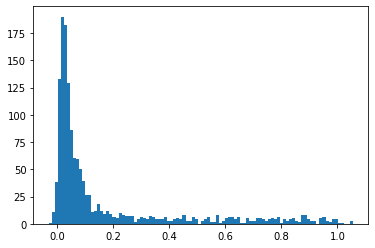

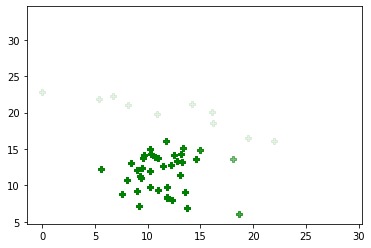

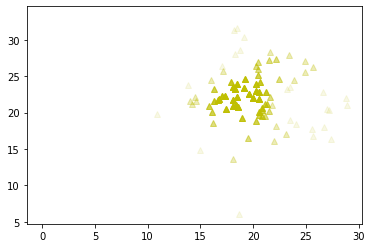

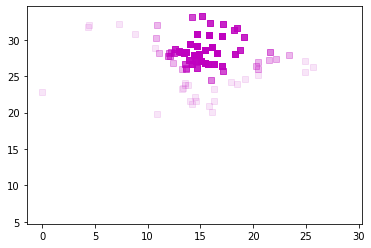

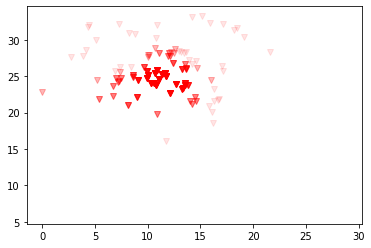

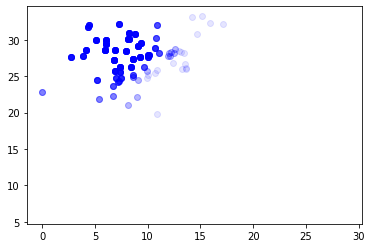

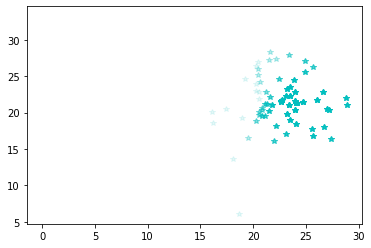

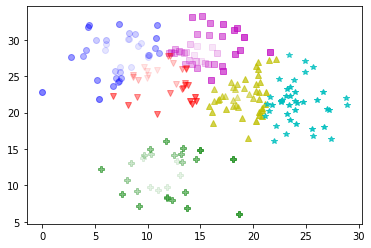

Aplicação do fuzzy_constraints_exato


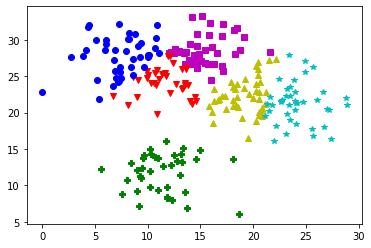

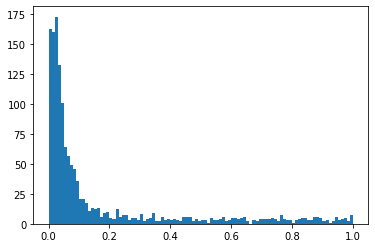

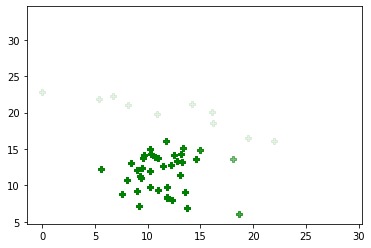

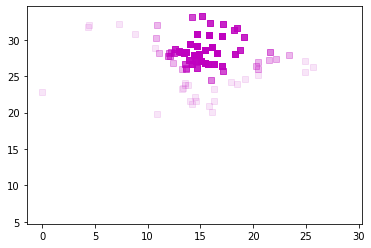

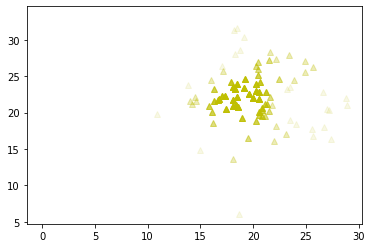

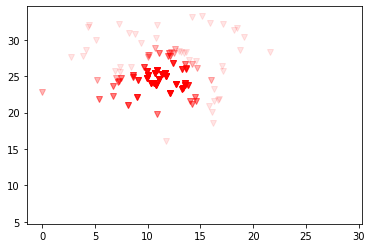

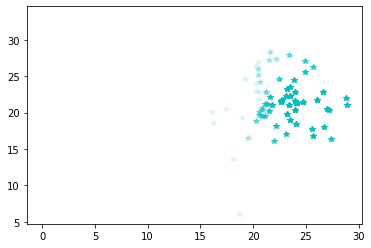

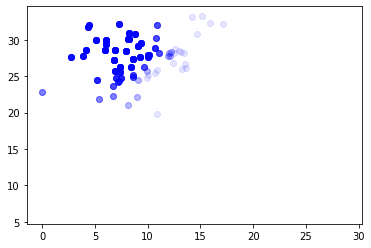

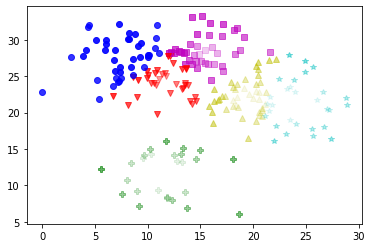

Conjunto Original: 22 


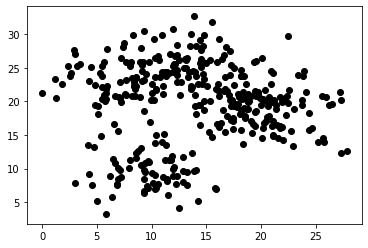

Aplicação do fuzzy_constraints


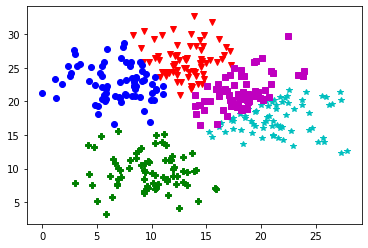

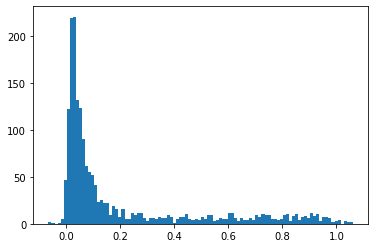

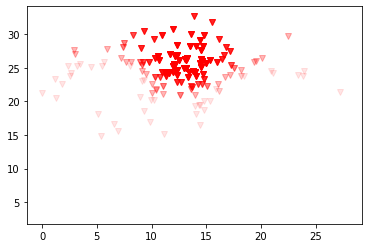

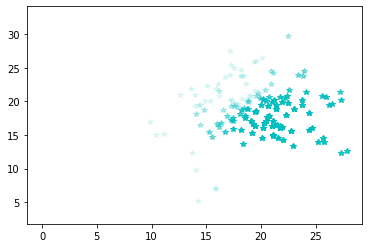

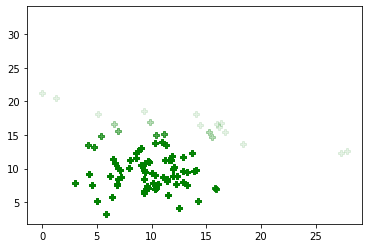

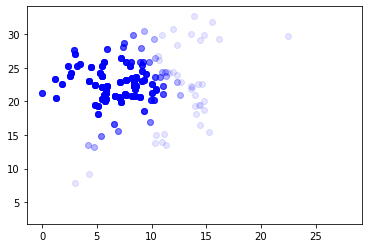

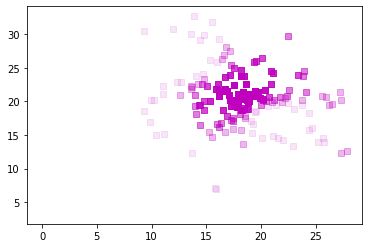

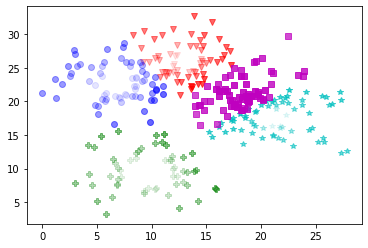

Aplicação do fuzzy_constraints_exato


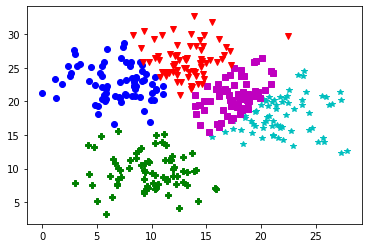

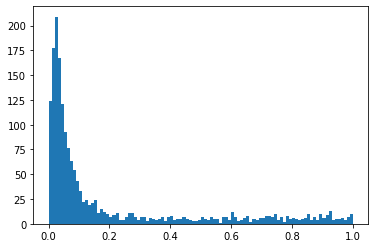

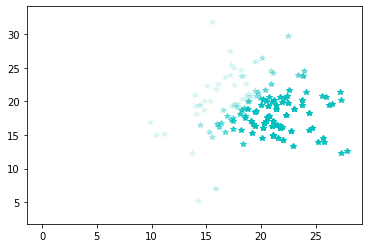

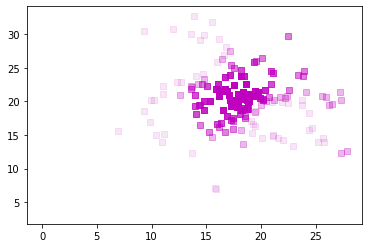

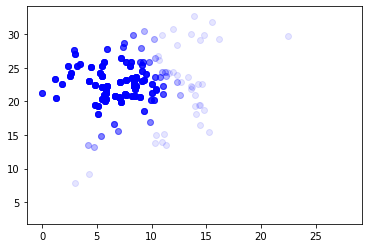

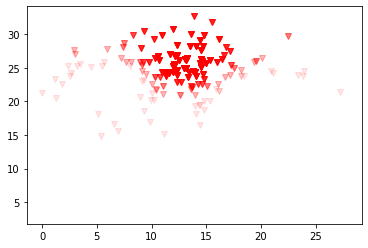

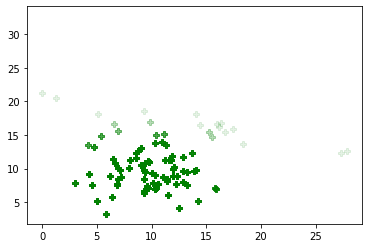

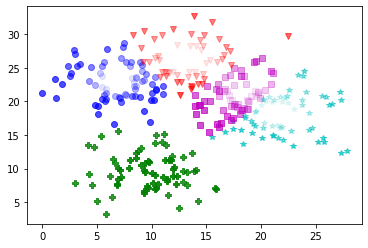

In [6]:
for path in ['data_2']:#,'data_5','data_7', 'data_8','data_16','data_22']: #datasets.keys():
    val_func_obj = []
    data = datasets[path]
    n_samples = data['n_samples']
    clusters = data['clusters']
    cluster_std = data['cluster_std']
    X = np.array(data['dataset'])
    Z = np.ones((n_samples,))
    mu = Z.sum()/clusters*np.ones((clusters,))
    
    a1, b1 = min(X[:,0]), max(X[:,0])
    a2, b2 = min(X[:,1]), max(X[:,1])

    centr_init = [np.concatenate((a1+(b1-a1)*np.random.rand(clusters,1),
                                 a2+(b2-a2)*np.random.rand(clusters,1)), axis=1)
                  for i in range(10)]

    #Plot do conjunto original
    print('\033[1mConjunto Original:', path.split('_')[1],'\033[0m')
    fig = plt.figure()
    plt.plot(X[:,0],X[:,1], 'ok')
    #fig.savefig('figures/'+path+'_original.png')
    plt.show()

    ####################################
    
    #Aplicação do fuzzy_constraints
    print('Aplicação do fuzzy_constraints')
    f_obj_best = np.inf
    for CENTROIDS in centr_init:
        LABELS, U = fuzzy_capacity_constraints(X,Z,clusters,0,CENTROIDS)
        labels = np.array(LABELS[-1])

        f_obj = funcao_objetivo_fuzzy(X,labels,U)

        if f_obj<f_obj_best:
            f_obj_best = f_obj
            label_best = labels
            U_best = U

    val_func_obj.append(f_obj_best)
    
    mapping_color = def_color(X,label_best,clusters)
    fig = plt.figure()
    for c in range(clusters):
        color = mapping_color[c]
        marker = def_marker(color)
        X0 = X[[label_best[i] == c for i in range(len(label_best))]]
        plt.plot(X0[:,0], X0[:,1], color+marker)
    #fig.savefig('figures/'+path+'_kmcc_ident.png')
    plt.show()

    fig = plt.figure()
    plt.hist(U_best.reshape(n_samples*clusters), bins=100)
    plt.show()
    
    for c in range(clusters):
        pertencimento_max = U_best[c]
        color = mapping_color[c]
        marker = def_marker(color)

        for i in range(10):
            if i == 0:
                indexes = (np.array(pertencimento_max) < (i+1)/10)
            elif i == 9:
                indexes = (i/10 <= np.array(pertencimento_max)) & (np.array(pertencimento_max) < (i+1)/10)
            else:
                indexes = (i/10 <= np.array(pertencimento_max))
            X_p = X[indexes]
            labels_p = list(np.array(label_best)[indexes])
            plt.plot(X_p[:,0], X_p[:,1], color+marker, alpha=i/10)
        plt.show()
        

    for i in range(10):
        indexes = (np.quantile(pertencimento_max, i/10) <= pertencimento_max) & (pertencimento_max < np.quantile(pertencimento_max, (i+1)/10)) 
        X_p = X[indexes]
        labels_p = list(np.array(label_best)[indexes])
        mapping_color = def_color(X,labels_p,clusters)
        for c in range(clusters):
            color = mapping_color[c]
            marker = def_marker(color)
            X0 = X_p[[labels_p[i] == c for i in range(len(labels_p))]]
            plt.plot(X0[:,0], X0[:,1], color+marker, alpha=i/10)
    plt.show()
    
    ###############################
    
    #Aplicação do fuzzy_constraints_exato
    print('Aplicação do fuzzy_constraints_exato')
    f_obj_best = np.inf
    for CENTROIDS in centr_init:
        LABELS, U = fuzzy_constraints_exato(X,Z,clusters,CENTROIDS)
        labels = np.array(LABELS[-1])

        f_obj = funcao_objetivo_fuzzy(X,labels,U)

        if f_obj<f_obj_best:
            f_obj_best = f_obj
            label_best = labels
            U_best = U

    val_func_obj.append(f_obj_best)
    
    mapping_color = def_color(X,label_best,clusters)
    fig = plt.figure()
    for c in range(clusters):
        color = mapping_color[c]
        marker = def_marker(color)
        X0 = X[[label_best[i] == c for i in range(len(label_best))]]
        plt.plot(X0[:,0], X0[:,1], color+marker)
    #fig.savefig('figures/'+path+'_kmcc_ident.png')
    plt.show()

    fig = plt.figure()
    plt.hist(U_best.reshape(n_samples*clusters), bins=100)
    plt.show()
    
    for c in range(clusters):
        pertencimento_max = U_best[c]
        color = mapping_color[c]
        marker = def_marker(color)

        for i in range(10):
            if i == 0:
                indexes = (np.array(pertencimento_max) < (i+1)/10)
            elif i == 9:
                indexes = (i/10 <= np.array(pertencimento_max)) & (np.array(pertencimento_max) < (i+1)/10)
            else:
                indexes = (i/10 <= np.array(pertencimento_max))
            X_p = X[indexes]
            labels_p = list(np.array(label_best)[indexes])
            plt.plot(X_p[:,0], X_p[:,1], color+marker, alpha=i/10)
        plt.show()
        

    for i in range(10):
        indexes = (np.quantile(pertencimento_max, i/10) <= pertencimento_max) & (pertencimento_max < np.quantile(pertencimento_max, (i+1)/10)) 
        X_p = X[indexes]
        labels_p = list(np.array(label_best)[indexes])
        mapping_color = def_color(X,labels_p,clusters)
        for c in range(clusters):
            color = mapping_color[c]
            marker = def_marker(color)
            X0 = X_p[[labels_p[i] == c for i in range(len(labels_p))]]
            plt.plot(X0[:,0], X0[:,1], color+marker, alpha=i/10)
    plt.show()

### Equi-balanced

Conjunto Original: 8 


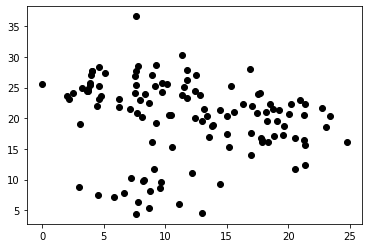

Aplicação do fuzzy_constraints


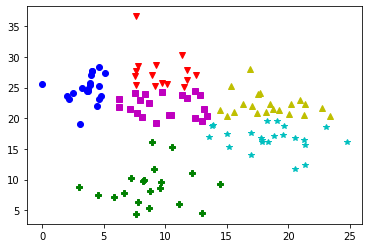

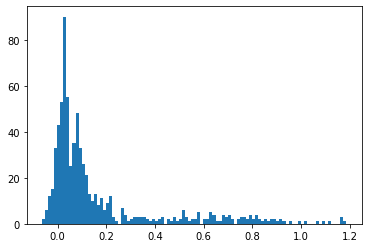

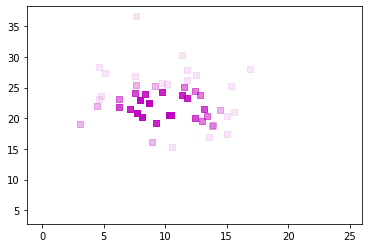

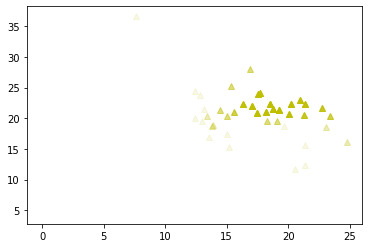

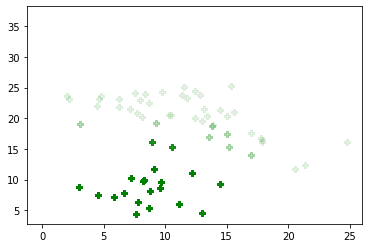

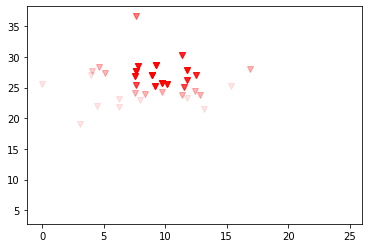

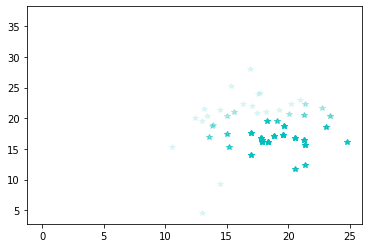

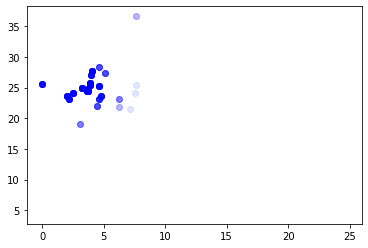

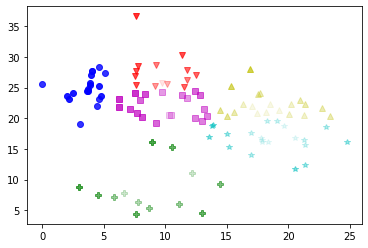

Aplicação do fuzzy_constraints_exato


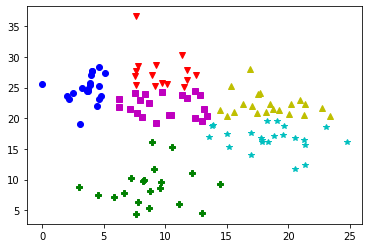

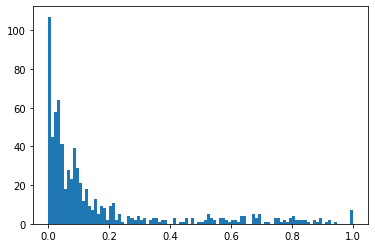

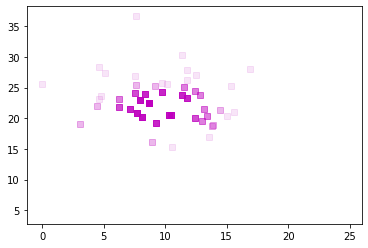

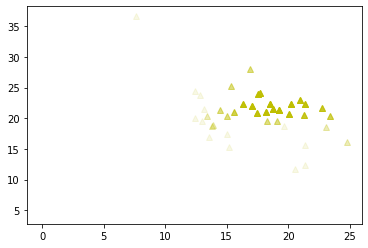

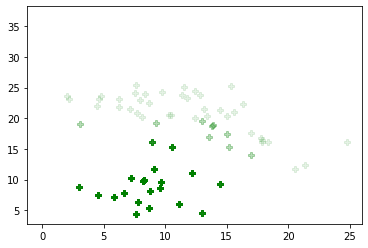

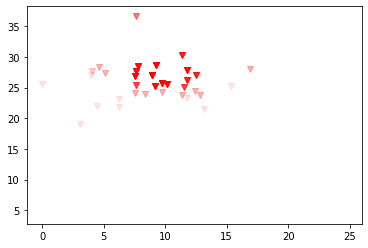

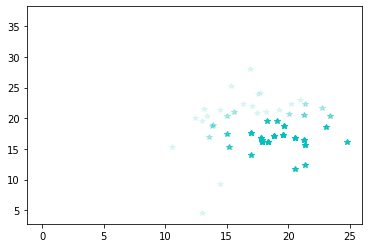

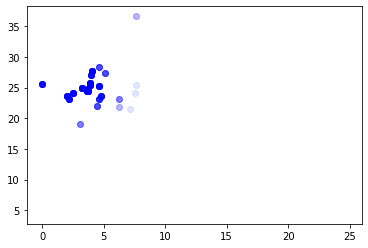

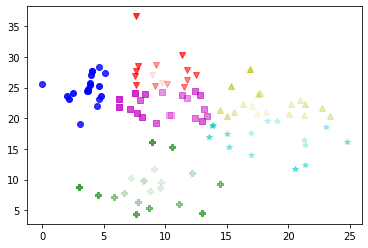

Conjunto Original: 16 


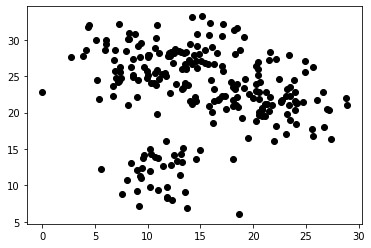

Aplicação do fuzzy_constraints


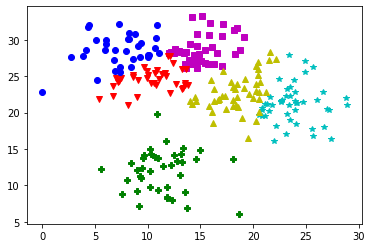

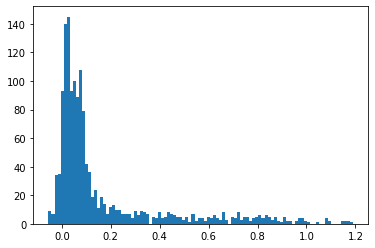

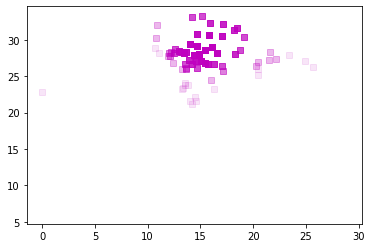

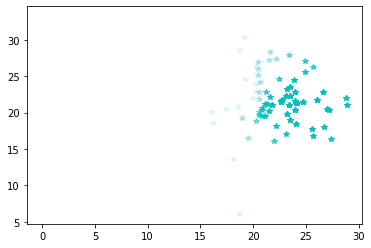

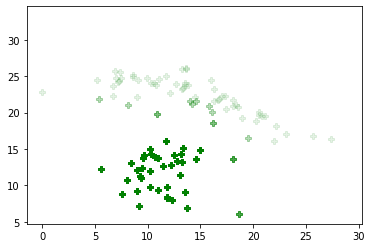

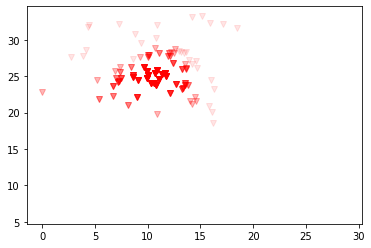

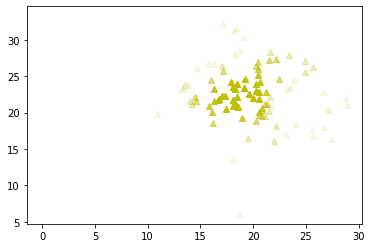

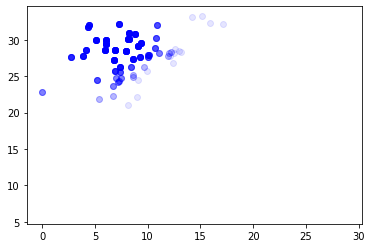

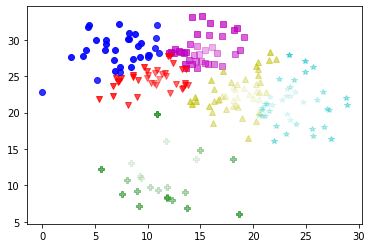

Aplicação do fuzzy_constraints_exato


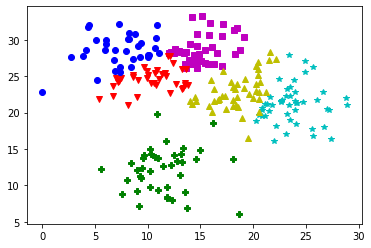

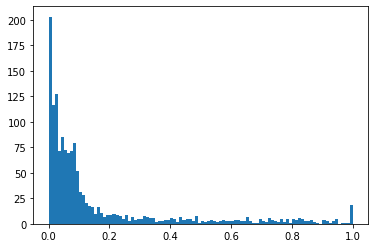

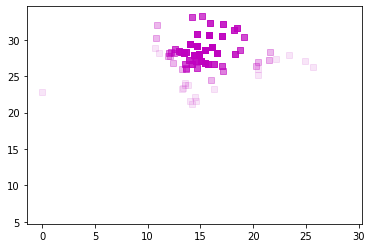

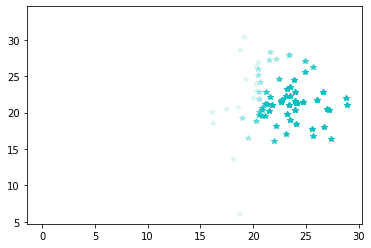

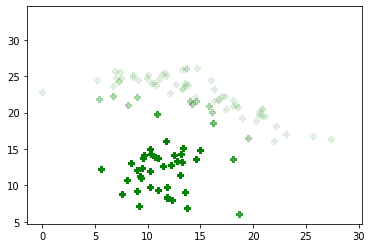

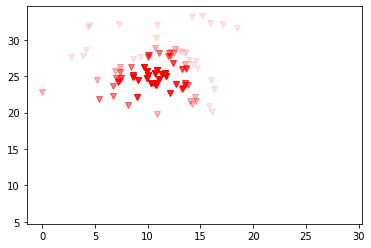

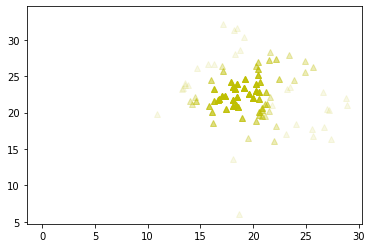

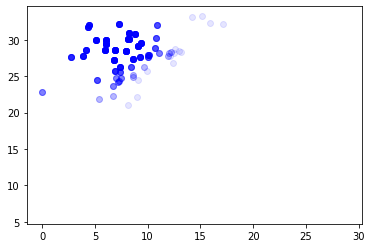

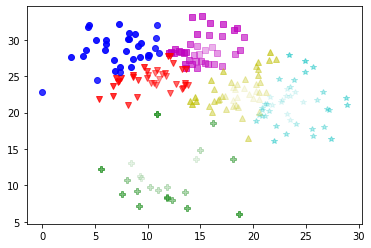

Conjunto Original: 22 


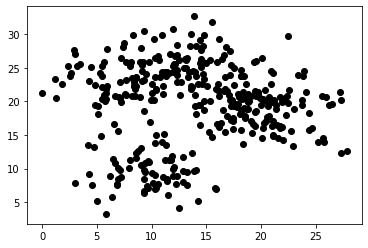

Aplicação do fuzzy_constraints


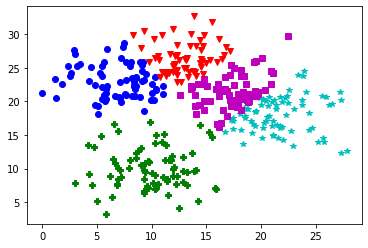

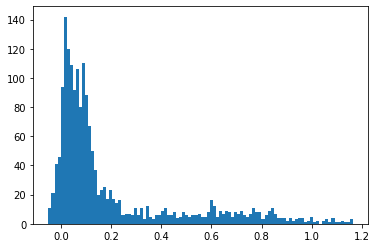

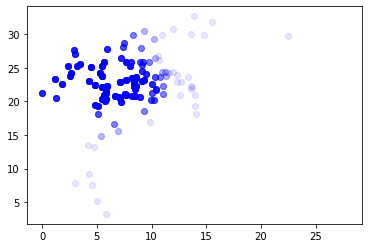

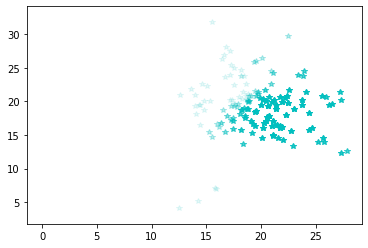

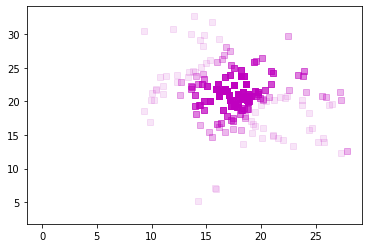

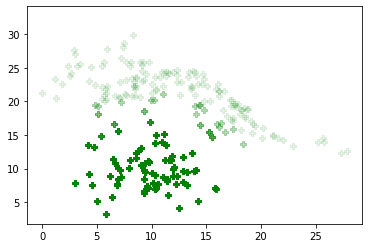

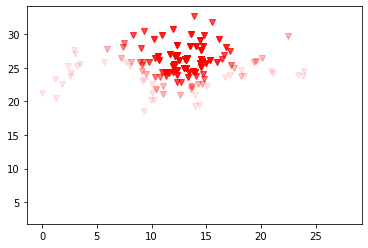

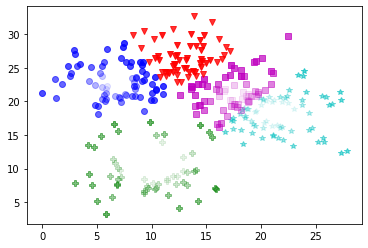

Aplicação do fuzzy_constraints_exato


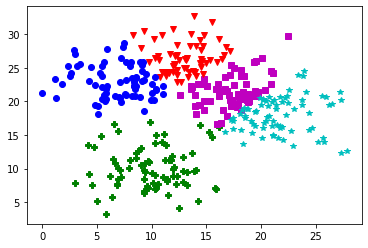

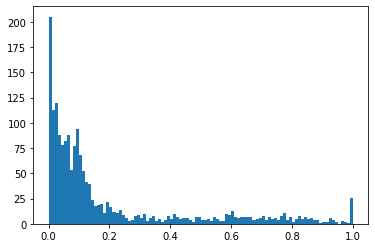

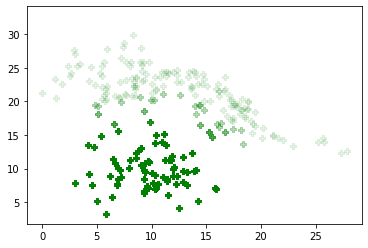

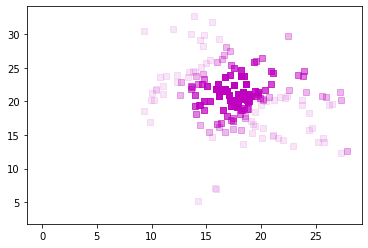

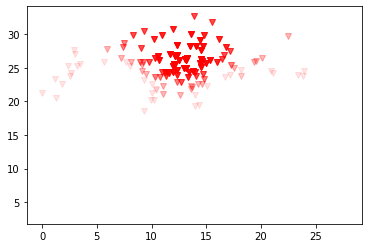

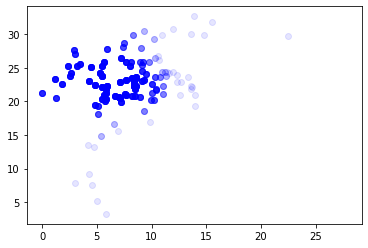

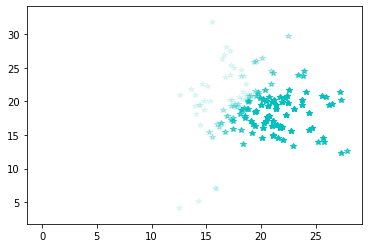

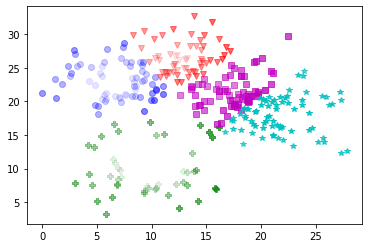

In [63]:
for path in ['data_8','data_16','data_22']:#datasets.keys():
    val_func_obj = []
    data = datasets[path]
    n_samples = data['n_samples']
    clusters = data['clusters']
    cluster_std = data['cluster_std']
    X = np.array(data['dataset'])
    Z = X[:,1]
    mu = Z.sum()/clusters*np.ones((clusters,))
    
    a1, b1 = min(X[:,0]), max(X[:,0])
    a2, b2 = min(X[:,1]), max(X[:,1])

    centr_init = [np.concatenate((a1+(b1-a1)*np.random.rand(clusters,1),
                                 a2+(b2-a2)*np.random.rand(clusters,1)), axis=1)
                  for i in range(10)]

    #Plot do conjunto original
    print('\033[1mConjunto Original:', path.split('_')[1],'\033[0m')
    fig = plt.figure()
    plt.plot(X[:,0],X[:,1], 'ok')
    #fig.savefig('figures/'+path+'_original.png')
    plt.show()

    ####################################
    
    #Aplicação do fuzzy_constraints
    print('Aplicação do fuzzy_constraints')
    f_obj_best = np.inf
    for CENTROIDS in centr_init:
        LABELS, U = fuzzy_capacity_constraints(X,Z,clusters,0,CENTROIDS)
        labels = np.array(LABELS[-1])

        f_obj = funcao_objetivo_fuzzy(X,labels,U)

        if f_obj<f_obj_best:
            f_obj_best = f_obj
            label_best = labels
            U_best = U

    val_func_obj.append(f_obj_best)
    
    mapping_color = def_color(X,label_best,clusters)
    fig = plt.figure()
    for c in range(clusters):
        color = mapping_color[c]
        marker = def_marker(color)
        X0 = X[[label_best[i] == c for i in range(len(label_best))]]
        plt.plot(X0[:,0], X0[:,1], color+marker)
    #fig.savefig('figures/'+path+'_kmcc_ident.png')
    plt.show()

    fig = plt.figure()
    plt.hist(U_best.reshape(n_samples*clusters), bins=100)
    plt.show()
    
    for c in range(clusters):
        pertencimento_max = U_best[c]
        color = mapping_color[c]
        marker = def_marker(color)

        for i in range(10):
            if i == 0:
                indexes = (np.array(pertencimento_max) < (i+1)/10)
            elif i == 9:
                indexes = (i/10 <= np.array(pertencimento_max)) & (np.array(pertencimento_max) < (i+1)/10)
            else:
                indexes = (i/10 <= np.array(pertencimento_max))
            X_p = X[indexes]
            labels_p = list(np.array(label_best)[indexes])
            plt.plot(X_p[:,0], X_p[:,1], color+marker, alpha=i/10)
        plt.show()
        

    for i in range(10):
        indexes = (np.quantile(pertencimento_max, i/10) <= pertencimento_max) & (pertencimento_max < np.quantile(pertencimento_max, (i+1)/10)) 
        X_p = X[indexes]
        labels_p = list(np.array(label_best)[indexes])
        mapping_color = def_color(X,labels_p,clusters)
        for c in range(clusters):
            color = mapping_color[c]
            marker = def_marker(color)
            X0 = X_p[[labels_p[i] == c for i in range(len(labels_p))]]
            plt.plot(X0[:,0], X0[:,1], color+marker, alpha=i/10)
    plt.show()
    
    ###############################
    
    #Aplicação do fuzzy_constraints_exato
    print('Aplicação do fuzzy_constraints_exato')
    f_obj_best = np.inf
    for CENTROIDS in centr_init:
        LABELS, U = fuzzy_constraints_exato(X,Z,clusters,CENTROIDS)
        labels = np.array(LABELS[-1])

        f_obj = funcao_objetivo_fuzzy(X,labels,U)

        if f_obj<f_obj_best:
            f_obj_best = f_obj
            label_best = labels
            U_best = U

    val_func_obj.append(f_obj_best)
    
    mapping_color = def_color(X,label_best,clusters)
    fig = plt.figure()
    for c in range(clusters):
        color = mapping_color[c]
        marker = def_marker(color)
        X0 = X[[label_best[i] == c for i in range(len(label_best))]]
        plt.plot(X0[:,0], X0[:,1], color+marker)
    #fig.savefig('figures/'+path+'_kmcc_ident.png')
    plt.show()

    fig = plt.figure()
    plt.hist(U_best.reshape(n_samples*clusters), bins=100)
    plt.show()
    
    for c in range(clusters):
        pertencimento_max = U_best[c]
        color = mapping_color[c]
        marker = def_marker(color)

        for i in range(10):
            if i == 0:
                indexes = (np.array(pertencimento_max) < (i+1)/10)
            elif i == 9:
                indexes = (i/10 <= np.array(pertencimento_max)) & (np.array(pertencimento_max) < (i+1)/10)
            else:
                indexes = (i/10 <= np.array(pertencimento_max))
            X_p = X[indexes]
            labels_p = list(np.array(label_best)[indexes])
            plt.plot(X_p[:,0], X_p[:,1], color+marker, alpha=i/10)
        plt.show()
        

    for i in range(10):
        indexes = (np.quantile(pertencimento_max, i/10) <= pertencimento_max) & (pertencimento_max < np.quantile(pertencimento_max, (i+1)/10)) 
        X_p = X[indexes]
        labels_p = list(np.array(label_best)[indexes])
        mapping_color = def_color(X,labels_p,clusters)
        for c in range(clusters):
            color = mapping_color[c]
            marker = def_marker(color)
            X0 = X_p[[labels_p[i] == c for i in range(len(labels_p))]]
            plt.plot(X0[:,0], X0[:,1], color+marker, alpha=i/10)
    plt.show()